In [ ]:
from data_utils import load_data
from moment_utils import *

DATAROOT = './'

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

In [4]:
data = load_data(DATAROOT)

In [5]:
# Load the data
names = ['F', 'N']

Ms = []
class_names = []
class_labels = []
arrayIDs = []
roiss = []
for name in names:

    df = data[name]['df']

    M = data[name]['dataAll']
    arrayID = data[name]['arrayID']
    rois = data[name]['rois']

    classes = df.classes.values
    class_name, class_label = np.unique(classes, return_inverse=True)

    Ms.append(jnp.array(M))
    class_names.append(classes)
    class_labels.append(class_label)
    arrayIDs.append(arrayID)
    roiss.append(rois)

In [6]:
import urllib
import pandas as pd

category_url = 'https://osf.io/download/pa9ry/'
category_path = os.path.join(DATAROOT, 'TVSD', "category53_wide-format.tsv")
urllib.request.urlretrieve(category_url, category_path)

category_data = pd.read_csv(category_path, sep='\t')
category_data

,uniqueID,Word,animal,arts and crafts supply,bird,body part,breakfast food,candy,clothing,clothing accessory,...,sea animal,seafood,sports equipment,tool,toy,vegetable,vehicle,watercraft,weapon,women's clothing
0,aardvark,aardvark,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abacus,abacus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,accordion,accordion,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acorn,acorn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,air_conditioner,air conditioner,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,yoke,yoke,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1850,yolk,yolk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1851,zebra,zebra,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1852,zipper,zipper,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
sumv = category_data.sum().values[2:]
catli = category_data.sum().index[2:]
sortID = np.argsort(sumv)
sorted_list = np.array([catli, sumv])[:, sortID]
sorted_list = {'name': sorted_list[0, :], 'count': sorted_list[1, :]}

print(pd.DataFrame(sorted_list))

sel_catss = [['furniture', 'game', 'animal', 'vegetable'],
             ['lighting', 'vehicle', 'plant', 'mammal'],
             ['clothing', 'container', 'fruit', 'farm animal']]

sel_catss = [['furniture', 'game', 'animal', 'fruit'],
             ['jewelry', 'vehicle', 'plant', 'mammal'],
             ['lighting', 'container', 'vegetable', 'farm animal']]

sel_catss = [['condiment', 'footwear', 'animal', 'fruit'],
             ['protective clothing', 'kitchen appliance', 'plant', 'bird'],
             ['lighting', 'office supply', 'vegetable', 'farm animal']]

sel_catss = [['condiment', 'game', 'animal', 'fruit'],
             ['safety equipment', 'school supply', 'food', 'bird'],
             ['lighting', 'office supply', 'vegetable', 'farm animal']]

                      name count
0                  jewelry    15
1                condiment    15
2                 footwear    15
3      protective clothing    16
4                outerwear    16
5                 lighting    16
6                    candy    16
7                   insect    17
8              garden tool    17
9              farm animal    18
10              watercraft    19
11                headwear    19
12                    game    19
13                   drink    19
14       kitchen appliance    20
15        women's clothing    20
16        safety equipment    21
17                 seafood    24
18           office supply    25
19           school supply    26
20                    bird    27
21       medical equipment    27
22            kitchen tool    27
23  construction equipment    28
24              sea animal    30
25             part of car    30
26   personal hygiene item    31
27                fastener    32
28      musical instrument    33
29        

In [8]:

def get_masks_for_things(sel_cats, data, class_names, is_cat=True, show=False):
    omas = []
    for catn in sel_cats:
        if is_cat:
            if show:
                print(catn)
            uID = data['uniqueID'].values

            cat_mask = data[catn].values == 1
            sel_objs = uID[cat_mask]
            if show:
                print(sel_objs)
            # [data[catn].values==1]

            assert (class_names[0] == class_names[1]).all()
            class_name = class_names[0]
            objs_mask = np.zeros(np.shape(class_name)[0]) == 1
            for sel_obj in sel_objs:
                objs_mask += class_name == sel_obj

            if show:
                print(np.sum(objs_mask))
            omas.append(objs_mask)
        else:
            assert (class_names[0] == class_names[1]).all()
            class_name = class_names[0]
            if show:
                print(np.sum(class_name == catn))
            omas.append(class_name == catn)
    return omas


def get_cat_cka(mi, sel_cats, Ms, roiss, omas):
    Ns = []
    Ss = []
    Cs = []
    for i in range(len(sel_cats)):
        oma_i = omas[i]

        Nr = []
        Sr = []
        Cr = []
        for j in range(len(sel_cats)):
            print('\r {}, {}'.format(i, j), end='')
            oma_j = omas[j]

            Ni = []
            Si = []
            Ci = []
            for roi in [0, 1, 2]:
                if i == j:
                    Ni.append(np.nan)
                    Si.append(np.nan)
                    Ci.append(np.nan)
                    continue
                Phi = Ms[mi][:, roiss[mi] == roi]
                Phi_a = Phi[oma_i, :].T
                Phi_b = Phi[oma_j, :].T

                nu_n, nu_s, _ = getest_all(Phi_a, Phi_b, indep_cols=True)
                d0_n, d0_s, d0_c = getest_all(Phi_a, Phi_a, indep_cols=False)
                d1_n, d1_s, d1_c = getest_all(Phi_b, Phi_b, indep_cols=False)

                Ni.append(nu_n/np.sqrt(d0_n*d1_n))
                Si.append(nu_s/np.sqrt(d0_s*d1_s))
                Ci.append(nu_s/np.sqrt(d0_c*d1_c))  # if identical_array:

            Nr.append(Ni)
            Sr.append(Si)
            Cr.append(Ci)
        Ns.append(Nr)
        Ss.append(Sr)
        Cs.append(Cr)
    Ns = np.array(Ns)
    Ss = np.array(Ss)
    Cs = np.array(Cs)

    return Ns, Ss, Cs


def plot_cat_cka(Ns, Ss, Cs, sel_cats):
    color = plt.cm.rainbow(np.linspace(0, 1, math.comb(len(sel_cats), 2)))
    ct = 0
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    for i in range(len(sel_cats)):
        for j in range(len(sel_cats)):

            if i <= j:
                continue
            ax.plot(np.arange(3), Ss[i, j, :], '--^', alpha=0.2, c=color[ct])
            ax.plot(np.arange(3), Cs[i, j, :], '-o', lw=3, alpha=1, label=sel_cats[i]+', '+sel_cats[j], c=color[ct])
            ax.set_xticks(np.arange(3), ['V1', 'V4', 'IT'])

            ax.set_title(sel_cats)
            ct += 1
            # ax.legend()
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            ax.set_ylim([0.4, 1.05])

In [9]:
mi = 1

Nss, Sss, Css = [], [], []
for sel_cats in sel_catss:
    omas = get_masks_for_things(sel_cats, category_data, class_names, is_cat=True)
    Ns, Ss, Cs = get_cat_cka(mi, sel_cats, Ms, roiss, omas)
    Nss.append(Ns)
    Sss.append(Ss)
    Css.append(Cs)

 3, 3

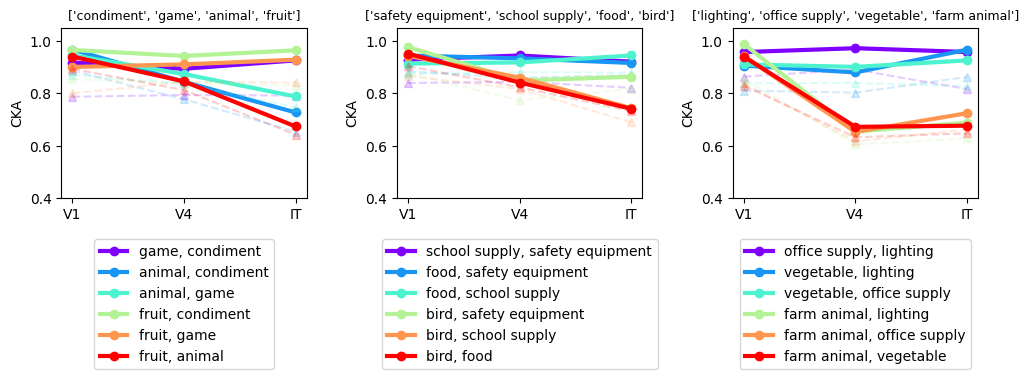

In [12]:
fig, ax_ori = plt.subplots(1, len(sel_catss), figsize=(10, 4.2))
for s, (sel_cats, Ns, Ss, Cs) in enumerate(zip(sel_catss, Nss, Sss, Css)):
    ax = ax_ori[s]
    color = plt.cm.rainbow(np.linspace(0, 1, math.comb(len(sel_cats), 2)))
    ct = 0
    for i in range(len(sel_cats)):
        for j in range(len(sel_cats)):

            if i <= j:
                continue
            ax.plot(np.arange(3), Ss[i, j, :], '--^', alpha=0.2, c=color[ct])
            ax.plot(np.arange(3), Cs[i, j, :], '-o', lw=3, alpha=1, label=sel_cats[i]+', '+sel_cats[j], c=color[ct])
            ax.set_xticks(np.arange(3), ['V1', 'V4', 'IT'])

            ax.set_title(sel_cats, fontsize=9)
            ct += 1
            ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
            ax.set_ylim([0.4, 1.05])
            ax.set_ylabel('CKA')

fig.tight_layout()

plt.savefig('./figures/obj_monkey{}.pdf'.format(mi), bbox_inches='tight')

In [13]:
sel_cats = ['furniture', 'game', 'animal', 'insect', 'lighting', 'vehicle',
            'plant', 'mammal', 'clothing', 'container', 'fruit', 'farm animal']
# sel_cats=['animal','insect','plant','mammal','fruit', 'farm animal']

uID = category_data['uniqueID'].values
class_name = class_names[0]
class_ll = class_labels[0]

class_idx = []
for catn in sel_cats:

    cat_mask = category_data[catn].values == 1
    sel_objs = uID[cat_mask]
    # [data[catn].values==1]

    for sel_obj in sel_objs:
        classNumber = class_ll[class_name == sel_obj]
        assert np.std(classNumber) == 0
        class_idx.append(classNumber[0])
class_idx = np.unique(class_idx)
# inputs_idx=np.argwhere(objs_mask)